In [2]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn import tree

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
df= pd.read_csv("/content/drive/MyDrive/Research Papers/XAI/Data/Dataset_Without_Lagged_Variables.csv")

In [5]:
df

,STATE,YEAR,real GDP(in billion U.S. dollars),ENROLL,TOTAL_EXPENDITURE,PER_CAPITA_EXPENDITURE,INSTRUCTION_EXPENDITURE_RATIO,SUPPORT_SERVICES_EXPENDITURE_RATIO,CAPITAL_OUTLAY_EXPENDITURE_RATIO
0,Alabama,2000,157.22,730184,5003267,6.852063,0.510009,0.263638,0.132694
1,Alabama,2001,156.85,728532,5086045,6.981224,0.522291,0.270203,0.106229
2,Alabama,2002,160.42,726367,5147821,7.087080,0.528522,0.274795,0.096380
3,Alabama,2003,165.13,727900,5298932,7.279753,0.531638,0.287126,0.081579
4,Alabama,2004,176.63,730418,5450269,7.461849,0.527606,0.290014,0.082495
...,...,...,...,...,...,...,...,...,...
845,Wyoming,2012,38.86,89994,1670728,18.564882,0.506247,0.323518,0.127636
846,Wyoming,2013,38.85,91533,1675477,18.304622,0.505451,0.326129,0.127677
847,Wyoming,2014,39.56,92732,1775999,19.151954,0.487575,0.312929,0.162149
848,Wyoming,2015,40.42,93867,1942406,20.693172,0.461237,0.291128,0.210782


In [6]:
# Define features (X) and target (y)
X = df[["TOTAL_EXPENDITURE", "PER_CAPITA_EXPENDITURE",
          "INSTRUCTION_EXPENDITURE_RATIO", "SUPPORT_SERVICES_EXPENDITURE_RATIO",
          "CAPITAL_OUTLAY_EXPENDITURE_RATIO"]]
y = df["real GDP(in billion U.S. dollars)"]

In [7]:
# Group by STATE and split within each state by YEAR
train_data = pd.DataFrame()
test_data = pd.DataFrame()

In [8]:
# Split the dataset by year within each state (state-wise temporal split)
cutoff_year = 2014  # Set the cutoff year for splitting
for state in df["STATE"].unique():
    state_data = df[df["STATE"] == state]
    train_data = pd.concat([train_data, state_data[state_data["YEAR"] < cutoff_year]])
    test_data = pd.concat([test_data, state_data[state_data["YEAR"] >= cutoff_year]])

In [9]:

# Define features (X) and target (y) for training and testing
X_train = train_data[["TOTAL_EXPENDITURE", "PER_CAPITA_EXPENDITURE",
                      "INSTRUCTION_EXPENDITURE_RATIO", "SUPPORT_SERVICES_EXPENDITURE_RATIO",
                      "CAPITAL_OUTLAY_EXPENDITURE_RATIO"]]
y_train = train_data["real GDP(in billion U.S. dollars)"]

X_test = test_data[["TOTAL_EXPENDITURE", "PER_CAPITA_EXPENDITURE",
                    "INSTRUCTION_EXPENDITURE_RATIO", "SUPPORT_SERVICES_EXPENDITURE_RATIO",
                    "CAPITAL_OUTLAY_EXPENDITURE_RATIO"]]
y_test = test_data["real GDP(in billion U.S. dollars)"]

In [10]:
# Train the Decision Tree model (default parameters)
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [11]:
# Predict on the test set
y_pred = dt_model.predict(X_test)

In [13]:
# Evaluate model performance
metrics = {
    "R2 Score": r2_score(y_test, y_pred),
    "MAE": mean_absolute_error(y_test, y_pred),
    "RMSE": mean_squared_error(y_test, y_pred)**0.5  # Calculate RMSE manually
}

Decision Tree Model Metrics:
{'R2 Score': 0.9022156887629583, 'MAE': 57.62393333333333, 'RMSE': 132.59152860571447}


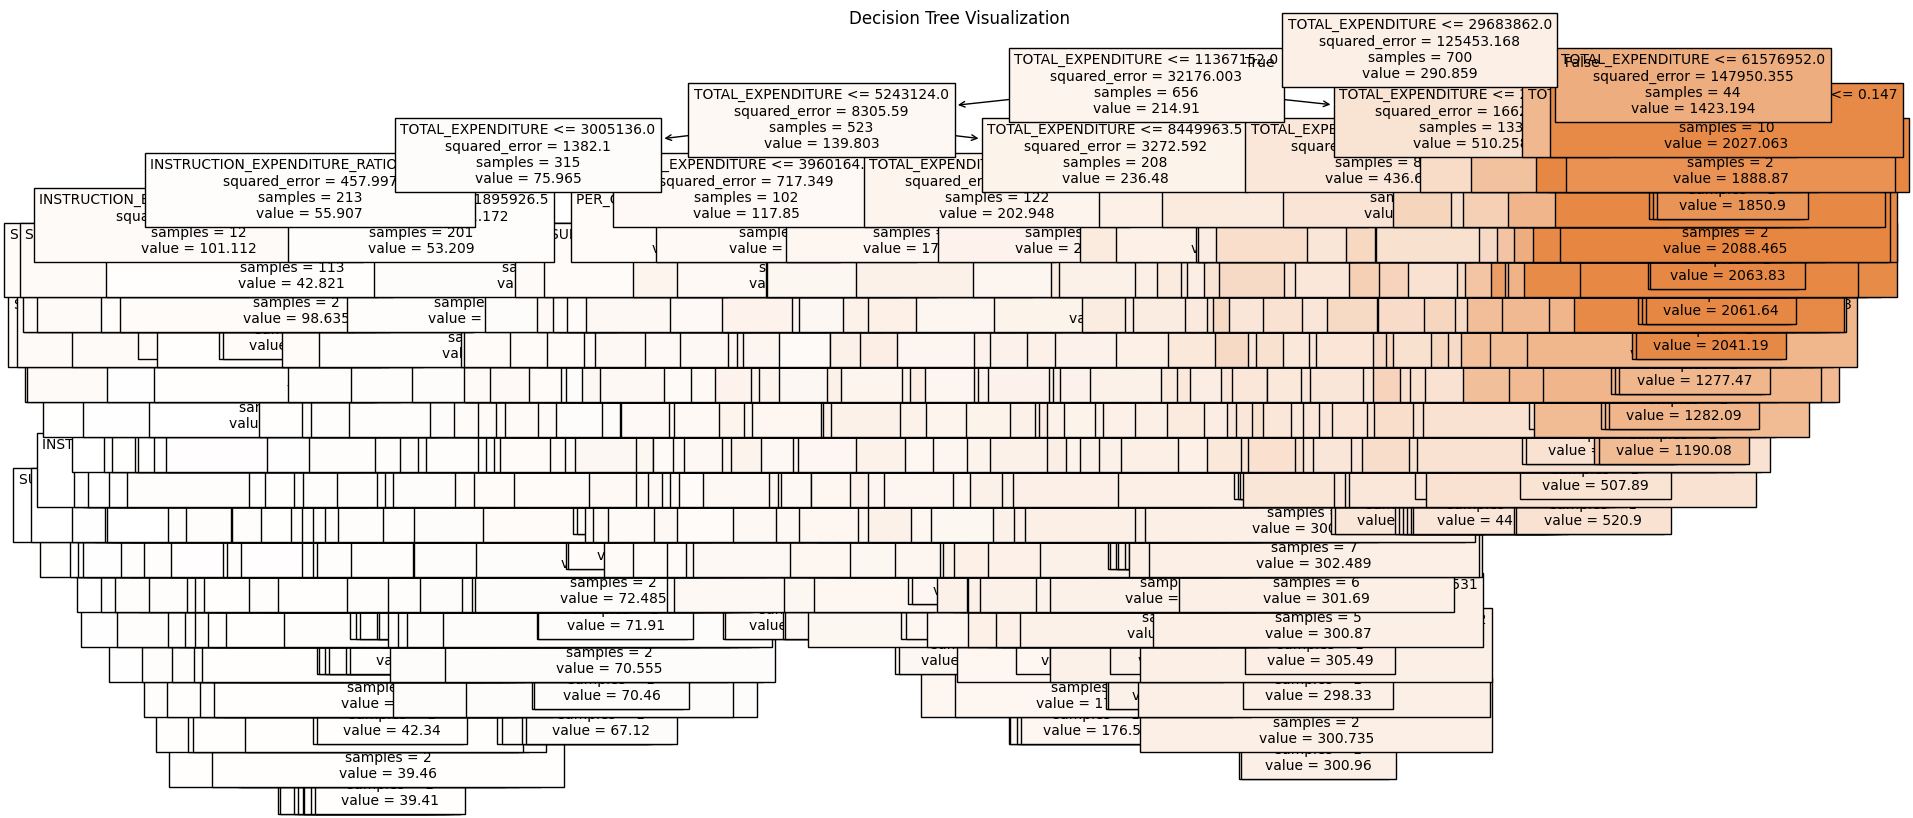

In [14]:
print("Decision Tree Model Metrics:")
print(metrics)

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_model, feature_names=X.columns, filled=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

**Hyperparameter Optimization using GridSearchCV **

In [18]:
from sklearn.model_selection import GridSearchCV
print("\n--- Hyperparameter Optimization ---")
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}
grid_search = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    scoring='neg_mean_squared_error',
    cv=5
)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


--- Hyperparameter Optimization ---
Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [19]:
# Train the optimized Decision Tree
optimized_model = DecisionTreeRegressor(random_state=42, **best_params)
optimized_model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=42)

In [21]:
# Predict and evaluate the optimized model
y_pred_optimized = optimized_model.predict(X_test)
optimized_metrics = {
    "R2 Score": r2_score(y_test, y_pred_optimized),
    "MAE": mean_absolute_error(y_test, y_pred_optimized),
    "RMSE": mean_squared_error(y_test, y_pred_optimized)**0.5  # Calculate RMSE manually
}
print("Optimized Model Metrics:", optimized_metrics)

Optimized Model Metrics: {'R2 Score': 0.8899120434472192, 'MAE': 63.29457958059521, 'RMSE': 140.6860681144554}



3. Cost Complexity Pruning

  



In [22]:
print("\n--- Cost Complexity Pruning ---")
path = optimized_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  # List of effective alphas
models = []

for ccp_alpha in ccp_alphas:
    model = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    model.fit(X_train, y_train)
    models.append(model)


--- Cost Complexity Pruning ---


In [23]:
# Evaluate models and find the best alpha
r2_scores = [r2_score(y_test, model.predict(X_test)) for model in models]
best_alpha = ccp_alphas[r2_scores.index(max(r2_scores))]
print("Best alpha for pruning:", best_alpha)

Best alpha for pruning: 10.375680017543804


In [24]:
# Train pruned model
pruned_model = DecisionTreeRegressor(random_state=42, ccp_alpha=best_alpha)
pruned_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=10.375680017543804, random_state=42)

In [27]:
# Predict and evaluate the pruned model
y_pred_pruned = pruned_model.predict(X_test)
pruned_metrics = {
    "R2 Score": r2_score(y_test, y_pred_pruned),
    "MAE": mean_absolute_error(y_test, y_pred_pruned),
    "RMSE": mean_squared_error(y_test, y_pred_pruned)**0.5  # Calculate RMSE manually by taking the square root
}
print("Pruned Model Metrics:", pruned_metrics)

Pruned Model Metrics: {'R2 Score': 0.9023318401934045, 'MAE': 59.58004707818408, 'RMSE': 132.5127569111578}


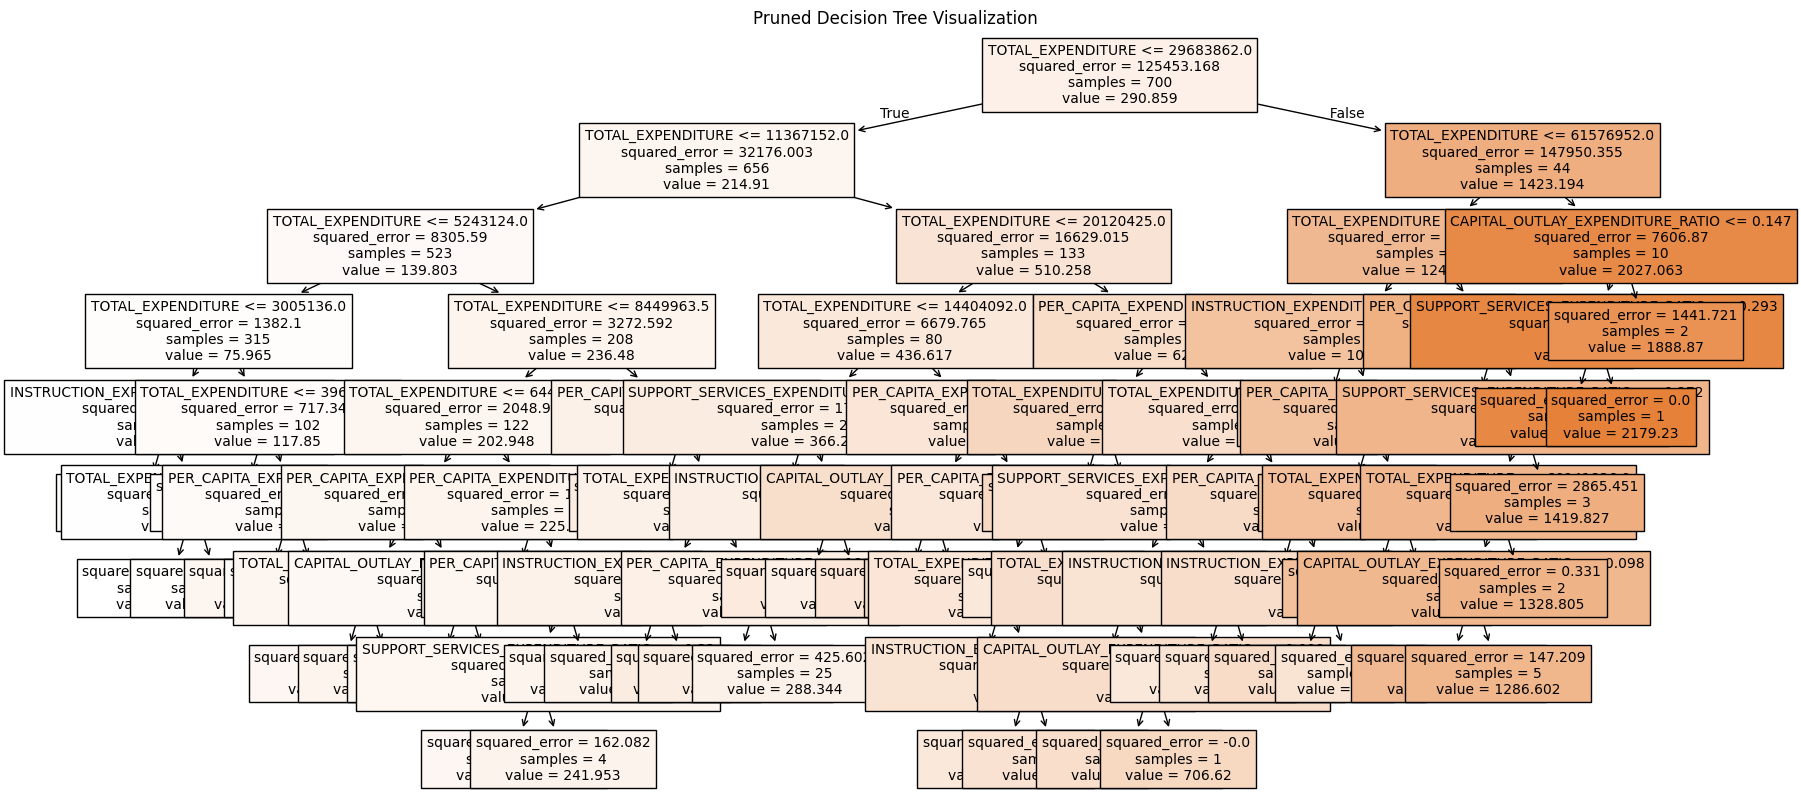

In [28]:
# Visualize the Pruned Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(pruned_model, feature_names=X.columns, filled=True, fontsize=10)
plt.title("Pruned Decision Tree Visualization")
plt.show()

SHAP

In [29]:
# Import SHAP and visualization libraries
import shap
import matplotlib.pyplot as plt

In [30]:

pruned_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=10.375680017543804, random_state=42)

In [31]:

# Initialize SHAP Explainer
explainer = shap.Explainer(pruned_model.predict, X_test)

In [37]:
# Calculate SHAP values for the test set
shap_values = explainer(X_test)

In [40]:
# --- 1. Force Plot (Local Explanation for One Prediction) ---
shap.initjs()  # Initialize JavaScript visualization
single_prediction = 0  # Index of the test sample to explain
shap.force_plot(
    shap_values.base_values[single_prediction], # Use base_values instead of expected_value
    shap_values.values[single_prediction],
    X_test.iloc[single_prediction, :]
)

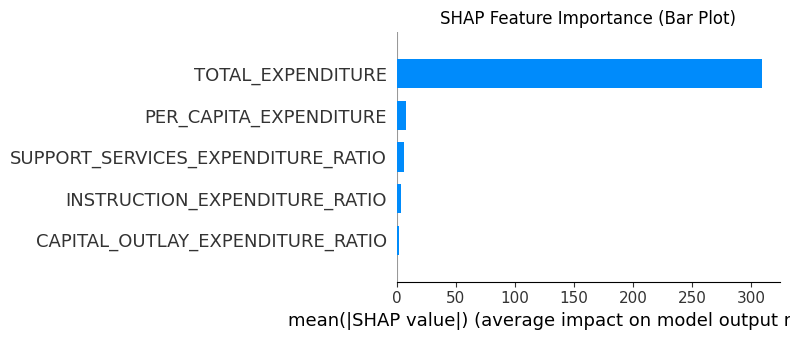

In [41]:
# --- 2. Feature Importance (Global Explanation) ---
# Bar plot of mean absolute SHAP values
plt.title("SHAP Feature Importance (Bar Plot)")
shap.summary_plot(shap_values, X_test, plot_type="bar")

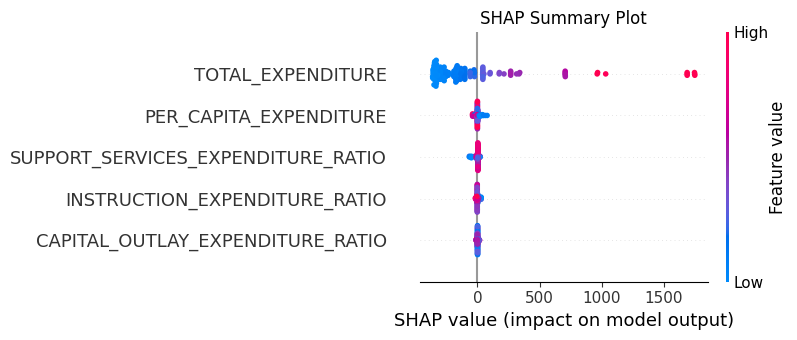

In [42]:

# --- 3. Summary Plot (Global Explanation of Feature Impacts) ---
# Distribution of SHAP values for each feature
plt.title("SHAP Summary Plot")
shap.summary_plot(shap_values, X_test)